In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from datetime import datetime
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor,export_graphviz
from sklearn.metrics import accuracy_score
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import adjusted_rand_score, homogeneity_score, completeness_score, v_measure_score
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import cross_val_score  # Cross-validation için gerekli fonksiyonu import ediyoruz


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/vehicle-sales-data/car_prices.csv


In [2]:
file_path = "/kaggle/input/vehicle-sales-data/car_prices.csv"
df = pd.read_csv(file_path)


# Keşifsel Veri Analizi (EDA - Exploratory Data Analysis)

In [3]:
df.shape  # DataFrame'in satır sayısı ve sütun sayısı döndürür.

(558837, 16)

In [4]:
df.describe().T  #istatistiksel özet


,count,mean,std,min,25%,50%,75%,max
year,558837.0,2010.038927,3.966864,1982.0,2007.0,2012.0,2013.0,2015.0
condition,547017.0,30.672365,13.402832,1.0,23.0,35.0,42.0,49.0
odometer,558743.0,68320.017767,53398.542821,1.0,28371.0,52254.0,99109.0,999999.0
mmr,558799.0,13769.377495,9679.967174,25.0,7100.0,12250.0,18300.0,182000.0
sellingprice,558825.0,13611.358810,9749.501628,1.0,6900.0,12100.0,18200.0,230000.0


In [5]:
df.info()  #veriseti hakkında genel bilgileri getirir

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493485 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558799 non-null  float64
 14  sellingprice  558825 non-null  float64
 15  saledate      558825 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 68.2+ MB


In [6]:
df.isna().sum()  #her sütundaki eksik (NaN) değerlerin toplamı


year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65352
vin                 4
state               0
condition       11820
odometer           94
color             749
interior          749
seller              0
mmr                38
sellingprice       12
saledate           12
dtype: int64

In [7]:
df.head(4)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)


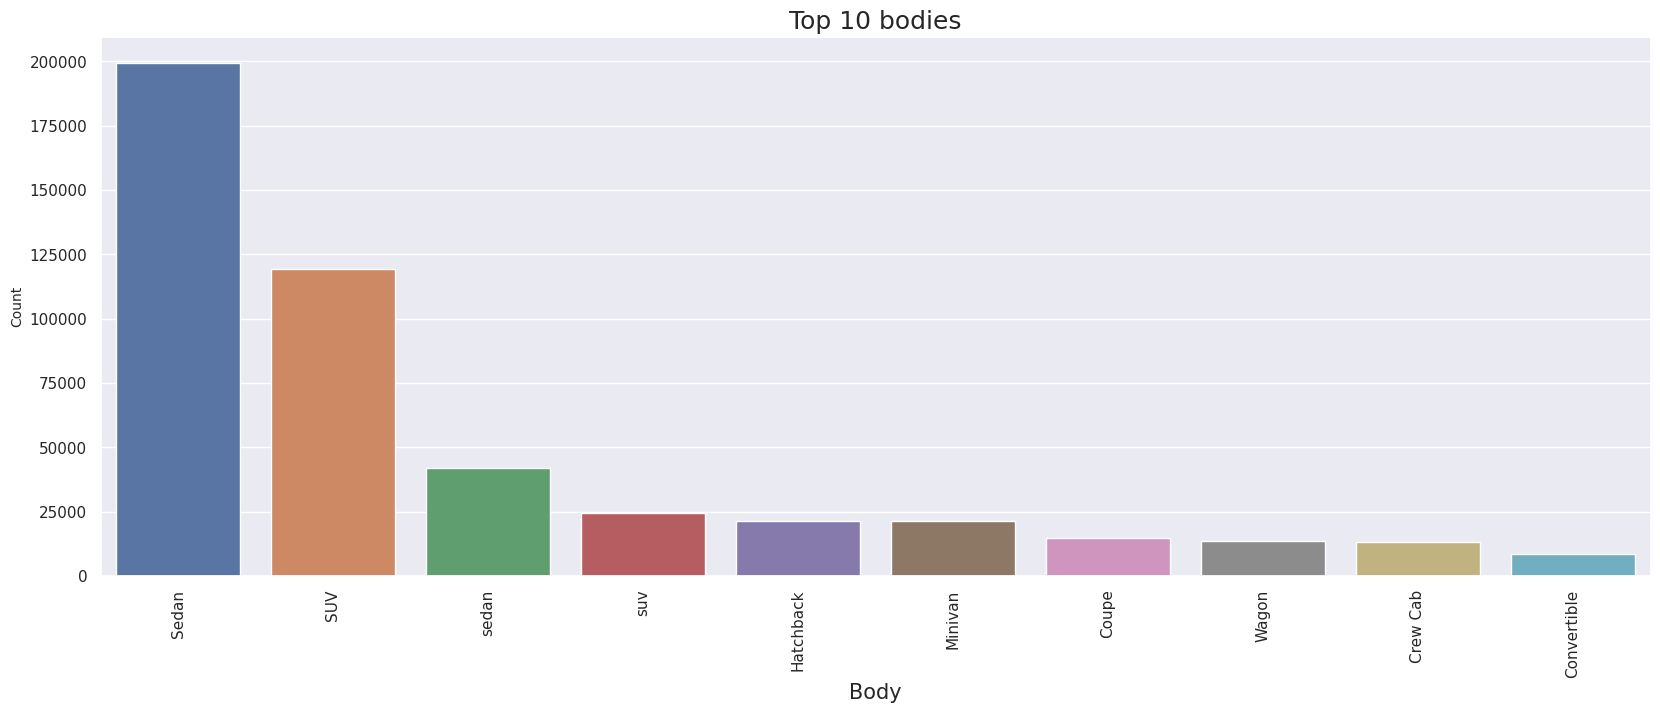

In [8]:
#en cok satan 10 arac tipi
sns.set(rc = {'figure.figsize': (20,7)})
top_10_body = df["body"].value_counts().head(10).reset_index()
top_10_body.columns = ["body","count"]
sns.barplot(y = "count", x = "body", data = top_10_body)
plt.title("Top 10 bodies", fontsize = 18)
plt.xlabel("Body", fontsize = 15)
plt.ylabel("Count", fontsize = 10)
plt.xticks(rotation=90)
plt.show()

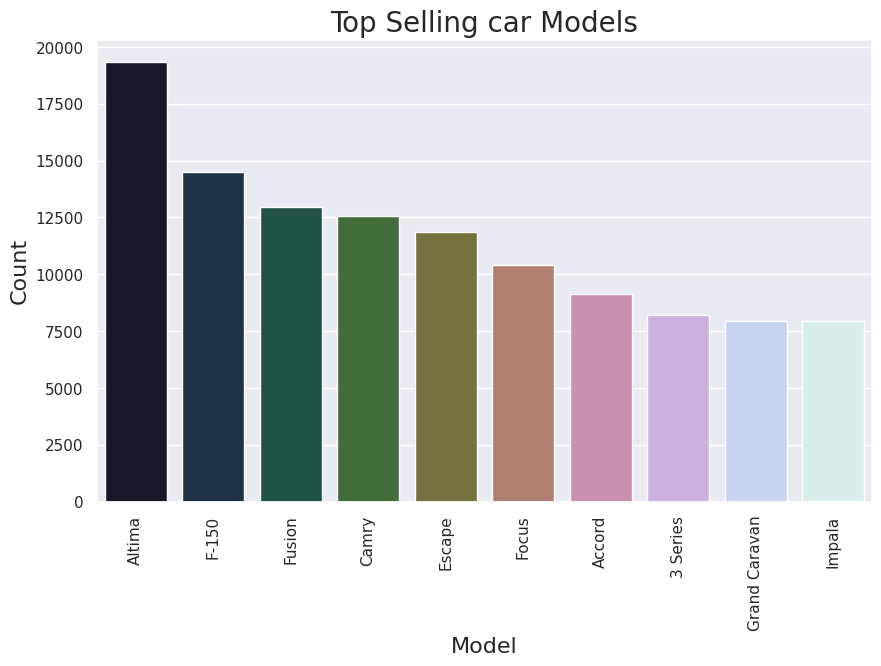

In [9]:
#en cok satılan araba modelleri ve fıyatlarını analız edelim
sns.set(rc = {'figure.figsize':(10,6)})
top_selling_models = df['model'].value_counts().head(10)
sns.barplot(y = top_selling_models.values, x = top_selling_models.index, palette = 'cubehelix')
plt.title("Top Selling car Models", fontsize = 20)
plt.xlabel("Model", fontsize = 16)
plt.ylabel("Count", fontsize = 16)
plt.xticks(rotation=90)
plt.show()

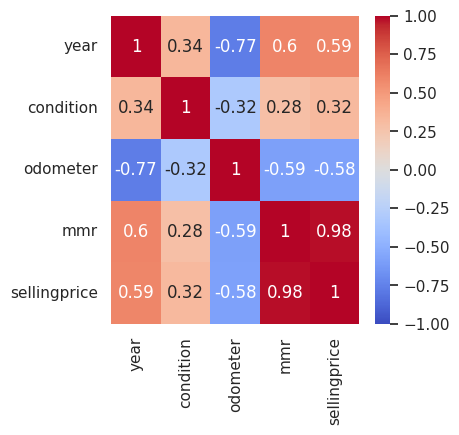

In [10]:
# Korelasyon matrisini hesaplama
#Korelasyon değişkenler arasındaki ilişkinin gücünü ve yönünü anlamaya yardımcı olur.
dfNumeric = df[['year','condition', 'odometer', 'mmr', 'sellingprice']]
dfNumeric_corr = dfNumeric.corr()
dfNumeric_corr[np.abs(dfNumeric_corr)<0.2] = 0
plt.figure(figsize=(4,4))
sns.heatmap(dfNumeric_corr,
            vmin=-1,
            vmax=1,
            cmap='coolwarm',
            annot=True);

## Veri Ön İşleme 

In [11]:
df.drop(columns=['vin','state','seller','interior'], inplace=True)
# satış fiyatını etkilemeyeceğini düşündüğüm colonları veri sretinden kalırıyorum

In [12]:
df.dropna(subset=['sellingprice'], inplace=True)
# satış fiyatı olmayan 12 satır vardı az bir sayı oldugundan bunları kaldırıyorum

In [13]:
# satıs tarıhı kolonunu ay ve yıl kolonlarına parcaladım numeric yapmak ıcın
df['saledate'] = df['saledate'].str.split(' ')
df['sale_month'] = df['saledate'].str[1]
df['sale_year'] = df['saledate'].str[3]
df.drop('saledate',axis=1,inplace=True)

In [14]:
df['sale_year'] = pd.to_numeric(df['sale_year'])


In [15]:
#bos satırlardakı kayıp degerleri medyan ıle doldurdum
numerical_columns = ['condition', 'odometer', 'mmr',
                    'sale_year']

for col in numerical_columns:
    df[col] = df[col].fillna(df[col].median())

In [16]:
#label encoder ile object verileri numeric verilere cevirdim
le = LabelEncoder()
df['make'] = le.fit_transform(df['make'])
df['model'] = le.fit_transform(df['model'])
df['trim'] = le.fit_transform(df['trim'])

df['transmission'] = le.fit_transform(df['transmission'])
df['body'] = le.fit_transform(df['body'])
df['color'] = le.fit_transform(df['color'])
df['sale_month'] = le.fit_transform(df['sale_month'])

In [17]:
df.isna().sum()  #her sütundaki eksik (NaN) değerlerin toplamı


year            0
make            0
model           0
trim            0
body            0
transmission    0
condition       0
odometer        0
color           0
mmr             0
sellingprice    0
sale_month      0
sale_year       0
dtype: int64

In [18]:
df.info()
# verileri numeric hale getirdim ve nan kısımları doldurdum.

<class 'pandas.core.frame.DataFrame'>
Index: 558825 entries, 0 to 558836
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558825 non-null  int64  
 1   make          558825 non-null  int64  
 2   model         558825 non-null  int64  
 3   trim          558825 non-null  int64  
 4   body          558825 non-null  int64  
 5   transmission  558825 non-null  int64  
 6   condition     558825 non-null  float64
 7   odometer      558825 non-null  float64
 8   color         558825 non-null  int64  
 9   mmr           558825 non-null  float64
 10  sellingprice  558825 non-null  float64
 11  sale_month    558825 non-null  int64  
 12  sale_year     558825 non-null  float64
dtypes: float64(5), int64(8)
memory usage: 59.7 MB


In [19]:
#bagımlı ve bagımsız degişkenleri tanımladım
y = df["sellingprice"]
x = df.drop(["sellingprice"],axis=1)

In [20]:
#veri setini eğitim ve test setlerine ayırdım
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


#  Algoritma Seçimi

In [21]:
#Doğrusal regresyon modeli
linear = LinearRegression()
model=linear.fit(x_train,y_train)  # Modeli eğitim verileri ile eğitiyoruz
linear_scores = cross_val_score(linear, x, y, cv=3)  
print("Doğrusal Regresyon Doğruluk Skorları:", linear_scores)
print(model.score(x_test,y_test))

Doğrusal Regresyon Doğruluk Skorları: [0.96715246 0.9701784  0.97057445]
0.9671808491626027


In [22]:
# Karar ağaçları regresyonu
tree_reg = DecisionTreeRegressor(random_state=42)
treeModel=tree_reg.fit(x_train, y_train)

# Modelin test verileri üzerindeki performansını değerlendirme
y_pred = tree_reg.predict(x_test)
r2 = r2_score(y_test, y_pred)# R² skorunu

print(f"Decision Tree R^2 Score: {r2}")

Decision Tree R^2 Score: 0.9477746458410505


In [23]:
# k-Nearest Neighbors kNN modeli
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)

y_pred = knn.predict(x_test)
label_encoder = LabelEncoder()
# Modeli değerlendir
knn_scores = cross_val_score(knn, x, y, cv=3)  # 3 katlı çapraz doğrulama
print("kNN Doğruluk Skorları:", knn_scores)

print("kNN Sınıflandırıcı Doğruluğu:", accuracy_score(y_test, y_pred))



kNN Doğruluk Skorları: [0.02240773 0.02061468 0.02048584]
kNN Sınıflandırıcı Doğruluğu: 0.022475730327025455


In [24]:
# Unsupervised Learning
# KMeans Clustering
kmeans = KMeans(n_clusters=2, random_state=42)# 2 küme ile KMeans modelini başlatıyoruz
kmeans.fit(x)
knn_scores = cross_val_score(knn, x, y, cv=3)  # 3 katlı çapraz doğrulama
print("kNN Doğruluk Skorları:", knn_scores)


# Kümeleri değerlendirmek için Adjusted Rand Index kullanımı
print("Adjusted Rand Index:", adjusted_rand_score(y, kmeans.labels_))#Kümelenme ve gerçek sınıflandırma arasındaki genel uyumu ölçer.
print("Homojenlik Skoru:", homogeneity_score(y, kmeans.labels_)) # Aynı sınıfa ait tüm örneklerin aynı kümeye düşme oranını ölçer
print("Completentlik Skoru:", completeness_score(y, kmeans.labels_)) #aynı sınıfa ait tüm örneklerin mümkün olduğunca aynı kümeye düşüp düşmediğini değerlendirir
print("V-Measure Skoru:", v_measure_score(y, kmeans.labels_))

kNN Doğruluk Skorları: [0.02240773 0.02061468 0.02048584]
Adjusted Rand Index: 0.002365853715023529
Homojenlik Skoru: 0.047444822479236586
Completentlik Skoru: 0.45147740066472153
V-Measure Skoru: 0.08586614960923206


# Model Değerlendirme


In [25]:
#linear regrasyon modeli en yuksek skor aldıgım model oldu
#modelin performansını değerlendirelim
y_pred = model.predict(x_test)

# Ortalama Kare Hatasını hesaplama
print(f'Linear Regression MSE: {mean_squared_error(y_test, y_pred)}')

# R² skorunu hesaplama
print(f'Linear Regression R² score: {r2_score(y_test, y_pred)}')

Linear Regression MSE: 3131524.6290410603
Linear Regression R² score: 0.9671808491626027
